In [ ]:
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import load_model
os.makedirs('/content/well_trained_models', exist_ok=True)
os.makedirs('/content/poorly_trained_models', exist_ok=True)
from google.colab import drive
drive.mount('/content/drive')

# Project Report: Analysis of CNN Performance on the Fashion MNIST Dataset

## 1. Introduction
The aim of this project is to investigate the performance and properties of Convolutional Neural Networks (CNNs) on the Fashion MNIST dataset by training 50 well-trained networks and 50 poorly-trained networks. Using these networks, the project seeks to evaluate whether the quality of an unknown CNN can be determined based on metrics such as weight distributions, gradient distributions, and convergence patterns. 

Fashion MNIST is a popular dataset consisting of 70,000 grayscale images of size $28 \times 28$ pixels, categorized into 10 classes. Each image represents a type of clothing or accessory (e.g., T-shirt, dress, sneaker). 

In [ ]:
# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalization to [0,1] range
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

## 2. Convolution Neural Networks (CNN)
CNNs are a class of deep neural networks specifically designed for image processing tasks.
They leverage convolutional layers to extract spatial features from images, followed by
pooling layers to reduce spatial dimensions. Fully connected layers at the end of the
network map extracted features to class predictions.
Key components of a CNN include:

• Convolutional Layers: Apply filters to the input image to detect features such
as edges, textures, and patterns.

• Pooling Layers: Downsample feature maps to reduce computational complexity
and improve robustness.

• Fully Connected Layers: Flatten the output of convolutional layers and connect
it to the final class predictions.

• Activation Functions: Introduce non-linearity (e.g., ReLU, Softmax) to allow
the network to model complex relationships.

• Regularization Techniques: Methods such as dropout prevent overfitting by
randomly deactivating neurons during training.

## 3. CNN Architecture
Five distinct CNN architectures were used to ensure diversity in model design. Table 1
provides an overview of these architectures.
Table 1: Overview of CNN Architectures

| Variant | Description       | Convolutional Layers | Pooling Layers | Dropout |
|---------|-------------------|----------------------|----------------|---------|
| 1       | Basic CNN         | 2                    | 2              | No      |
| 2       | Deep CNN          | 3                    | 2              | No      |
| 3       | CNN with Dropout  | 2                    | 2              | Yes     |
| 4       | Wide CNN          | 2                    | 1              | Yes     |
| 5       | Shallow CNN       | 1                    | 1              | No      |

Each architecture differs in its depth, number of filters, and use of regularization,
enabling a comprehensive analysis of network behavior.

In [4]:
def create_cnn_model(variant):
    if variant == 1:  # Basic CNN
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])
    elif variant == 2:  # Deep CNN
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])
    elif variant == 3:  # CNN with dropout
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(64, activation='relu'),
            layers.Dropout(0.5),
            layers.Dense(10, activation='softmax')
        ])
    elif variant == 4:  # Wide CNN
        model = models.Sequential([
            layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(256, activation='relu'),
            layers.Dropout(0.3),
            layers.Dense(10, activation='softmax')
        ])
    elif variant == 5:  # Shallow CNN
        model = models.Sequential([
            layers.Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(32, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])
    return model

def train_model(model, x_train, y_train, epochs, batch_size, optimizer, save_path):
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=1)
    model.save(save_path)
    return model

## 4. Training Process
The training process was divided into two categories: well-trained and poorly-trained
networks.

### 5.1 Well-Trained Networks
Well-trained networks were designed to maximize performance on the Fashion MNIST
dataset. The training configurations included:

- Optimizer: Adam with a learning rate of 0.001.
- Number of Epochs: Randomly selected between 10 and 15.
- Batch Size: Fixed at 32.
- Validation Split: 10% of the training data used for validation.

These configurations were chosen to ensure proper convergence and high accuracy on the
dataset.

### 5.2 Poorly-Trained Networks
Poorly-trained networks were intentionally trained under suboptimal conditions to induce
poor performance. The training configurations included:

- Optimizer: SGD with a randomly chosen learning rate between 0.01 and 0.1.
- Number of Epochs: Randomly selected between 1 and 5.
- Batch Size: Randomly chosen between 64 and 128.
- Validation Split: 10% of the training data used for validation.

These configurations aimed to prevent proper convergence, resulting in networks with
poor accuracy and suboptimal weight distributions.

In [ ]:
well_trained_dir = "/content/well_trained_models"
os.makedirs(well_trained_dir, exist_ok=True)
for i in range(50):
    variant = np.random.randint(1, 6)  # architecture option
    model = create_cnn_model(variant)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # good optimizer
    model = train_model(
        model, x_train, y_train,
        epochs=np.random.randint(10, 15),  # more epochs
        batch_size=32,
        optimizer=optimizer,
        save_path=f"{well_trained_dir}/model_{i}.h5"
    )

In [ ]:
poorly_trained_dir = "/content/poorly_trained_models"
os.makedirs(poorly_trained_dir, exist_ok=True)
for i in range(50):
    variant = np.random.randint(1, 6)  # architecture option
    model = create_cnn_model(variant)
    optimizer = tf.keras.optimizers.SGD(learning_rate=np.random.uniform(0.01, 0.1))  # bad optimizer
    model = train_model(
        model, x_train, y_train,
        epochs=np.random.randint(1, 5),  # less epochs
        batch_size=np.random.choice([64, 128]),  # bigger batch size
        optimizer=optimizer,
        save_path=f"{poorly_trained_dir}/model_{i}.h5"
    )

## 6. Analysis of Weights and Gradients in CNNs
### 6.1. Weight Distribution Analysis
The analyze_weights function is designed to examine the distribution of weights in a trained neural network model. Weights play a critical role in determining the network’s ability to generalize and learn from data. This function:

	-	Loads a specified model from a file path.
	-	Extracts the weights from each layer of the model.
	-	Visualizes the weight distribution for each layer using histograms.

Weight distributions provide insights into how the training process has shaped the model’s parameters. For example, well-trained models often exhibit specific patterns in weight distributions, such as a bell-shaped curve or other uniformity.


In [3]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt

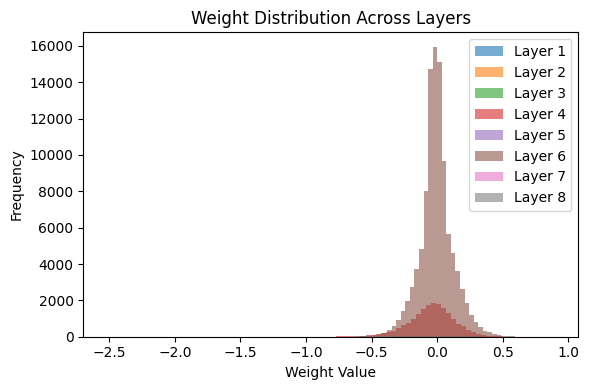

In [27]:
def recursive_collect_weights(group, weights):
    """
    Collects weights from .h5 model
    """
    for key in group.keys():
        item = group[key]
        if isinstance(item, h5py.Group):
            recursive_collect_weights(item, weights)
        elif isinstance(item, h5py.Dataset):
            weights.append(item[:]) # collects data from weights
            
def plot_weight_distributions(model_path):
    """
    Plots the weight distribution in model
    """
    try:
        with h5py.File(model_path, "r") as f:
            if "model_weights" in f.keys():
                weights = []
                recursive_collect_weights(f["model_weights"], weights)

                if not weights:
                    print("No weights found in the model.")
                    return

                # plot charts
                plt.figure(figsize=(6, 4))
                for i, weight in enumerate(weights):
                    plt.hist(weight.flatten(), bins=50, alpha=0.6, label=f'Layer {i+1}')
                plt.title("Weight Distribution Across Layers")
                plt.xlabel("Weight Value")
                plt.ylabel("Frequency")
                plt.legend()
                plt.tight_layout()
                plt.show()
            else:
                print("The file does not contain 'model_weights'.")
    except Exception as e:
        print(f"Error while plotting weights: {e}")
plot_weight_distributions("well/model_0.h5")

## 6. Analyzing weight distribution for each variant (1 - 6) of architecture for well trained neural networks

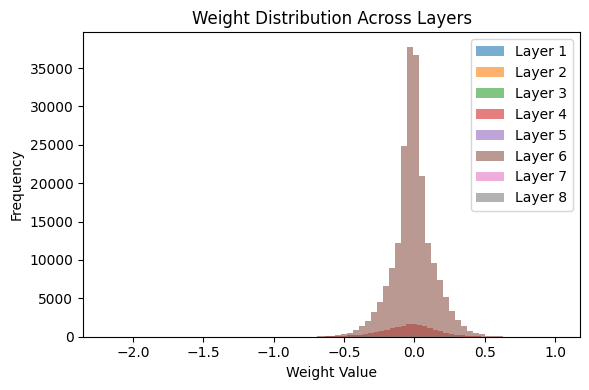

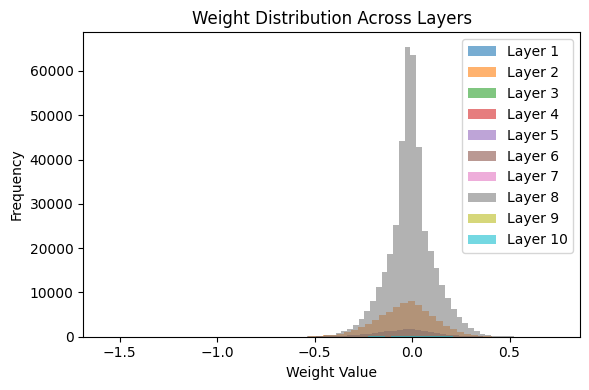

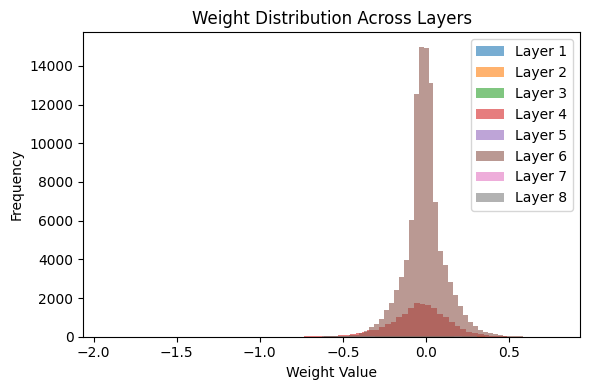

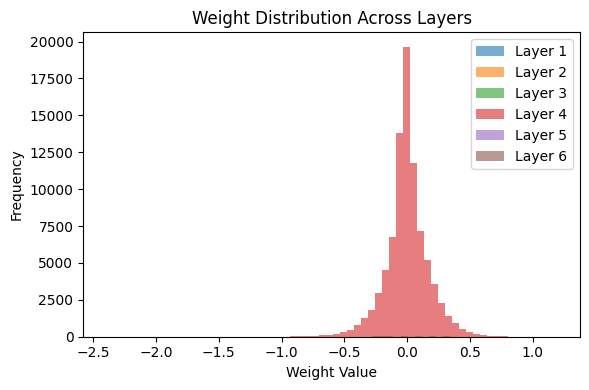

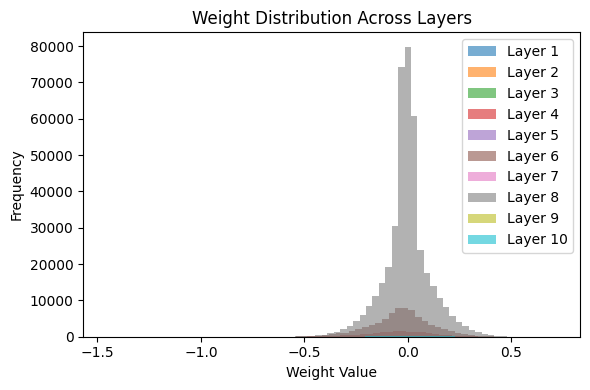

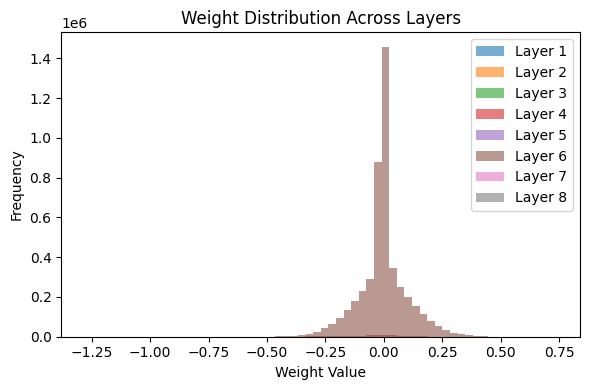

In [44]:
plot_weight_distributions("well/model_1.h5")
plot_weight_distributions("well/model_2.h5")
plot_weight_distributions("well/model_3.h5")
plot_weight_distributions("well/model_4.h5")
plot_weight_distributions("well/model_5.h5")
plot_weight_distributions("well/model_6.h5")

## 6. Analyzing weight distribution for each variant (1 - 6) of architecture for poorly trained neural networks

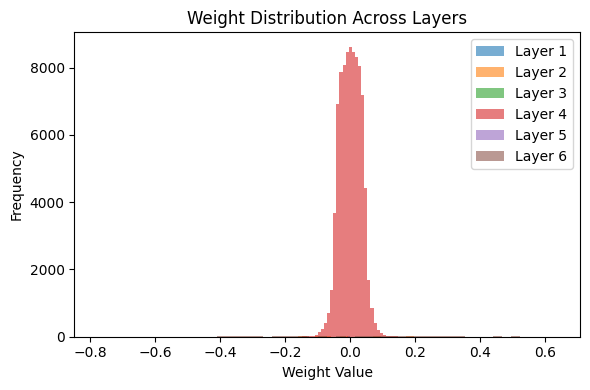

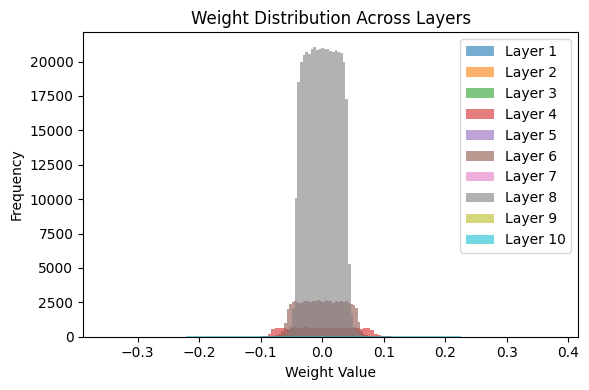

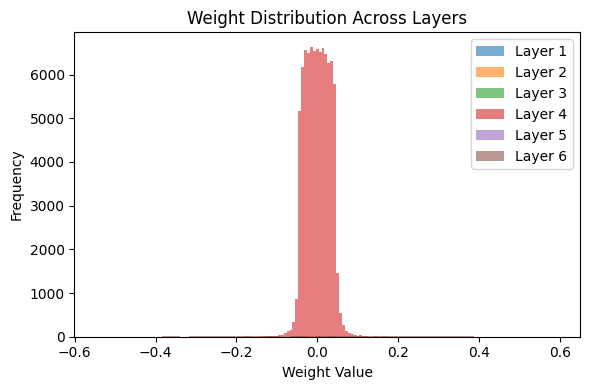

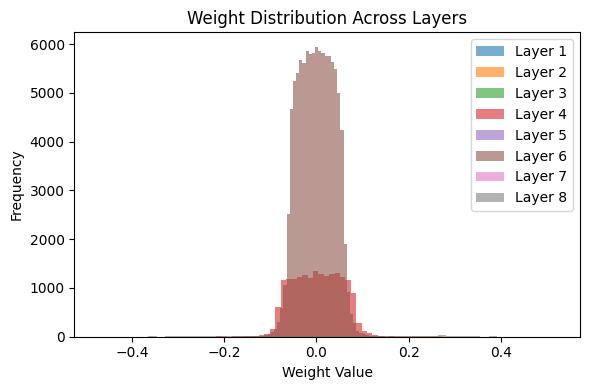

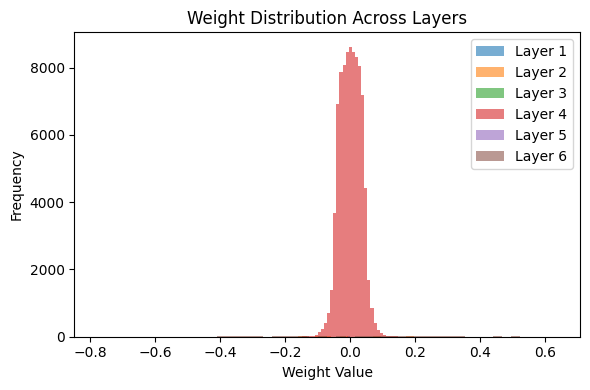

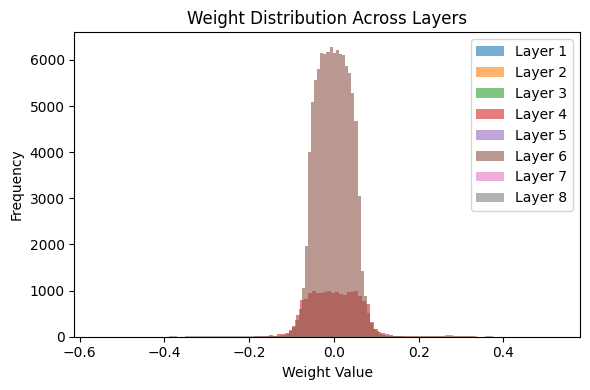

In [46]:
plot_weight_distributions("poor/model_1.h5")
plot_weight_distributions("poor/model_2.h5")
plot_weight_distributions("poor/model_3.h5")
plot_weight_distributions("poor/model_4.h5")
plot_weight_distributions("poor/model_5.h5")
plot_weight_distributions("poor/model_6.h5")

## 6.3. Combined plot of all networks - comparison of poor an well trained networks

The two provided histograms represent the combined weight distributions of neural networks:

1.	First Histogram: Well-Trained Networks
	-	The distribution of weights for the well-trained networks closely resembles a Gaussian (normal) distribution. This is expected in networks that have undergone effective training, as optimization algorithms like SGD or Adam adjust weights to minimize loss while preventing extreme values.
	-	The bell-shaped curve indicates:
		-	Most weights are concentrated near zero.
		-	A balanced training process that avoids exploding or vanishing weights.

2.	Second Histogram: Poorly-Trained Networks
	-	The distribution of weights for poorly-trained networks deviates from the Gaussian shape.
	-	Non bell-shaped (tower-shaped curve) curve exhibits: 
		-	Less symmetry around zero.
		-	Greater irregularities in the weight values, indicating suboptimal weight adjustment during training.
		-	This could result from issues such as a poorly chosen learning rate, insufficient training epochs, or lack of regularization.

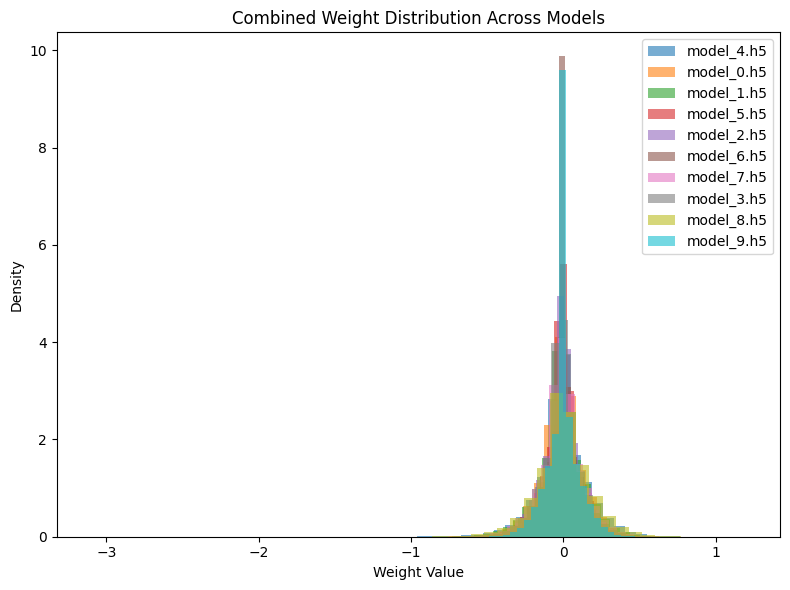

In [ ]:
def plot_combined_weight_distributions(folder_path):
    """
    Function that draws a combined plot for all models
    """
    try:
        all_weights = []
        model_names = []

        # Iteration through all networks in set
        for file_name in os.listdir(folder_path):
            if file_name.endswith(".h5"):
                model_path = os.path.join(folder_path, file_name)
                with h5py.File(model_path, "r") as f:
                    if "model_weights" in f.keys():
                        weights = []
                        def collect_layer_weights(group):
                            # Grab the weights
                            for key in group.keys():
                                item = group[key]
                                if isinstance(item, h5py.Group):
                                    collect_layer_weights(item)
                                elif isinstance(item, h5py.Dataset):
                                    weights.append(item[:])

                        collect_layer_weights(f["model_weights"])
                        if weights:
                            combined_weights = np.concatenate([w.flatten() for w in weights])
                            all_weights.append(combined_weights)
                            model_names.append(file_name)

        if not all_weights:
            print("No weights found in any model.")
            return

        # making a plot
        plt.figure(figsize=(8, 6))
        for weights, model_name in zip(all_weights, model_names):
            plt.hist(weights, bins=50, alpha=0.6, label=model_name, density=True)

        plt.title("Combined Weight Distribution Across Models")
        plt.xlabel("Weight Value")
        plt.ylabel("Density")
        plt.legend()
        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error while plotting combined weights: {e}")

plot_combined_weight_distributions("well")

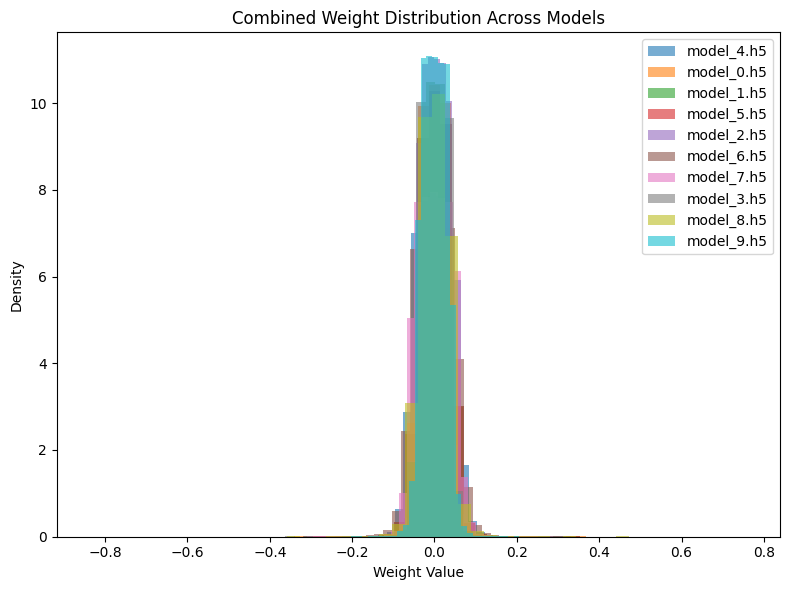

In [43]:
plot_combined_weight_distributions("poor")

The difference between the two histograms highlights a clear distinction:

-	Well-trained models exhibit a Gaussian-like distribution, indicating controlled and effective weight adjustment during training.
-	Poorly-trained models deviate from this ideal, reflecting irregularities that align with suboptimal training practices.

These observations demonstrate that weight distributions can serve as a diagnostic tool for evaluating training quality.

## 6.4. Plotting the individual layers for each variant

In [24]:
def plot_individual_weight_distributions(model_path):
    """
    Funkcja do rysowania indywidualnych wykresów rozkładu wag dla każdej warstwy w pliku HDF5.
    """
    try:
        with h5py.File(model_path, "r") as f:
            if "model_weights" not in f.keys():
                print("The file does not contain 'model_weights'.")
                return

            weights = []
            layer_names = []

            def collect_layer_weights(group, layer_name=""):
                """
                Rekurencyjnie zbiera wagi z grup w pliku HDF5.
                """
                for key in group.keys():
                    item = group[key]
                    if isinstance(item, h5py.Group):
                        collect_layer_weights(item, layer_name + "/" + key if layer_name else key)
                    elif isinstance(item, h5py.Dataset):
                        weights.append(item[:])
                        layer_names.append(layer_name)

            collect_layer_weights(f["model_weights"])

            if not weights:
                print("No weights found in the model.")
                return

            # Rysowanie wykresów
            num_layers = len(weights)
            plt.figure(figsize=(5 * num_layers, 5))
            for i, (weight, layer_name) in enumerate(zip(weights, layer_names)):
                plt.subplot(1, num_layers, i + 1)
                plt.hist(weight.flatten(), bins=50, alpha=0.6)
                plt.title(f"{layer_name}\nWeight Dist")
                plt.xlabel("Weight Value")
                plt.ylabel("Frequency")

            plt.tight_layout()
            plt.show()

    except Exception as e:
        print(f"Error while plotting weights: {e}")

## 6.4.1 Variant 3 - Dropout CNN
We can see that well trained neural network permormanced much better than the poorly trained:
1. Gaussian-like distribution of weights:
- A well-trained network has symmetric weight distributions concentrated near zero, suggesting an efficient optimizer and no instability in the gradients.
2. Regularity in layers:
- Convolutional (conv2d_5) and dense (dense_4) layers show a more consistent distribution of weights, indicating effective learning and matching.
3. Less irregularity:
- A poorly trained network shows a more chaotic distribution, with weights scattered over a wider range, suggesting an optimization problem or lack of adequate training time.

well trained:


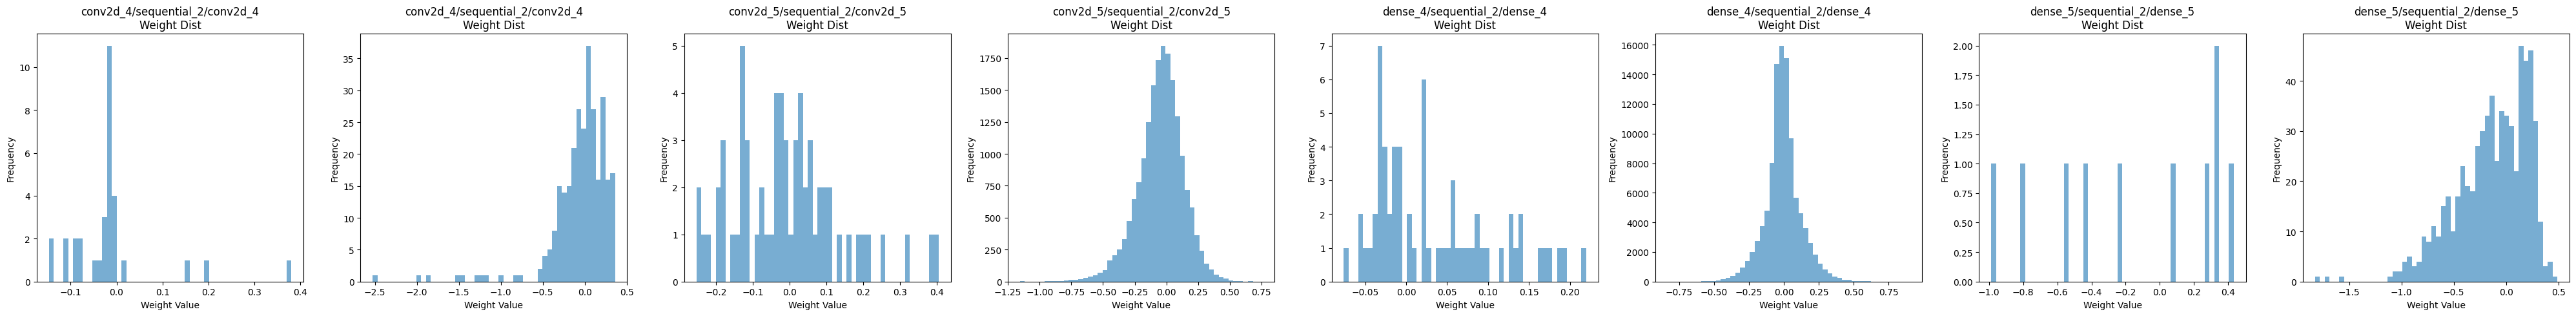

poorly trained:


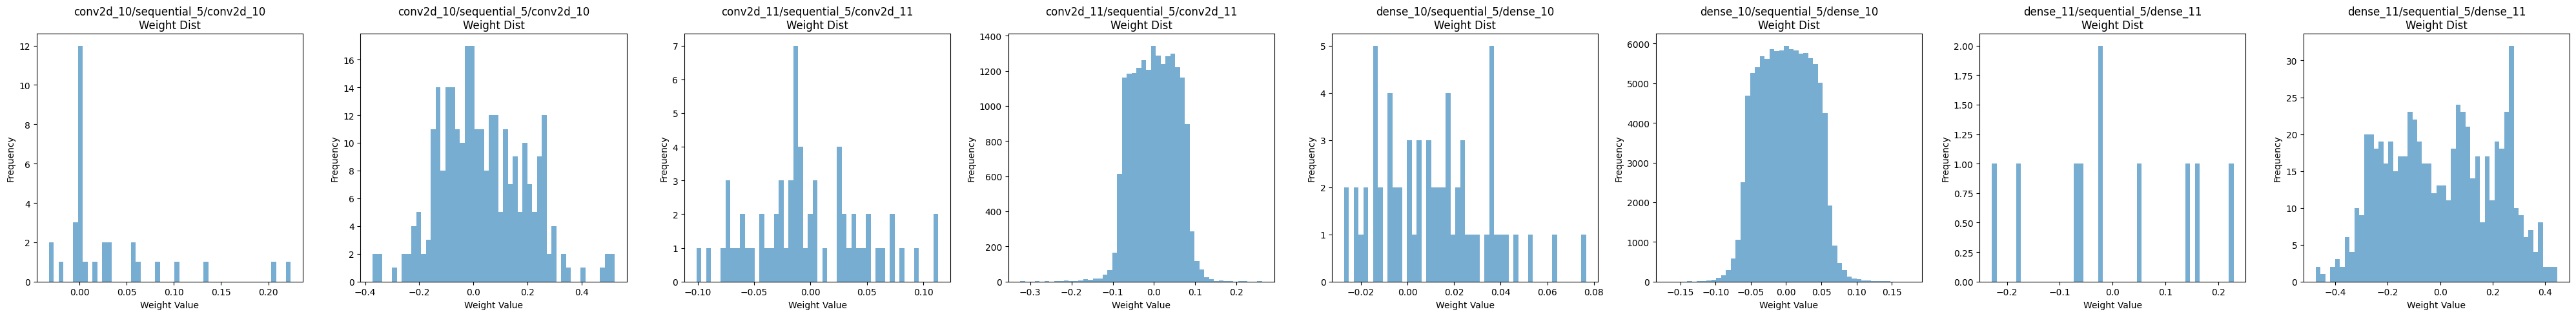

In [52]:
print("well trained:")
plot_individual_weight_distributions("well/model_0.h5")
print("poorly trained:")
plot_individual_weight_distributions("poor/model_4.h5")

## 6.4.2 Variant 5 - Wide CNN

1. Well-trained networks show bell-shaped distributions for weights in later layers, reflecting effective learning and weight regularization.
2. Poorly-trained networks demonstrate scattered or uniform-like distributions, indicating instability in the optimization process or insufficient convergence.

well trained:


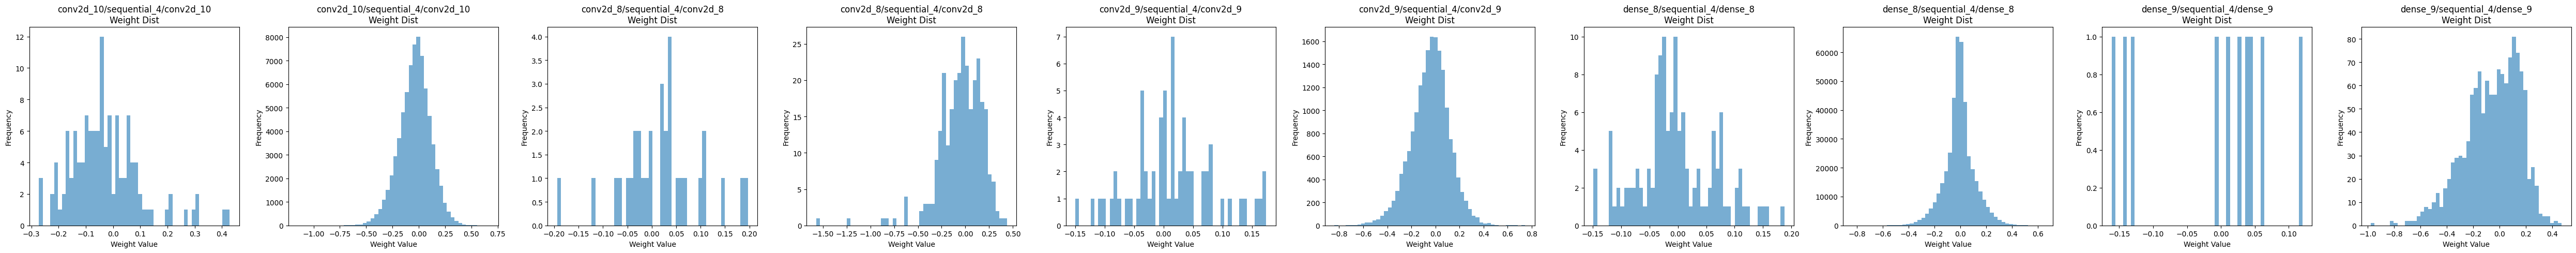

poorly trained:


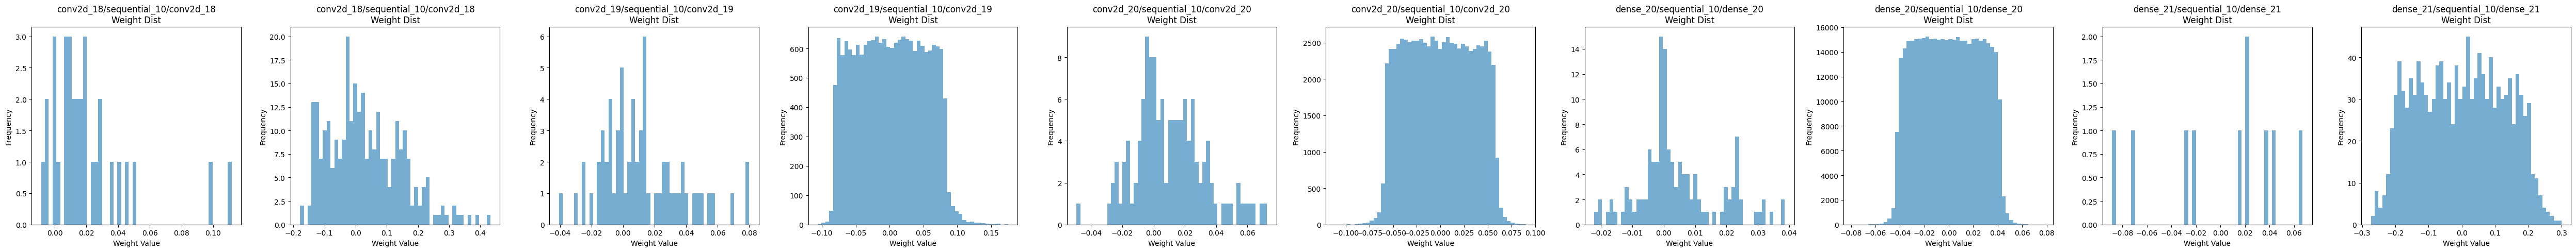

In [76]:
print("well trained:")
plot_individual_weight_distributions("well/model_2.h5")
print("poorly trained:")
plot_individual_weight_distributions("poor/model_9.h5")

## 6.4.3 Variant 1 - Basic CNN

1.	Well-Trained Network:
	-	Exhibits symmetric Gaussian-like distributions in later layers, reflecting effective weight optimization and training stability.
	-	Indicates that the network architecture allows for robust feature extraction and convergence.
2.	Poorly-Trained Network:
	-	Shows irregular and sparse distributions, particularly in dense layers, suggesting incomplete training or poor initialization.
	-	The convolutional layers also show scattered weights, indicating issues with learning low-level features.

well trained:


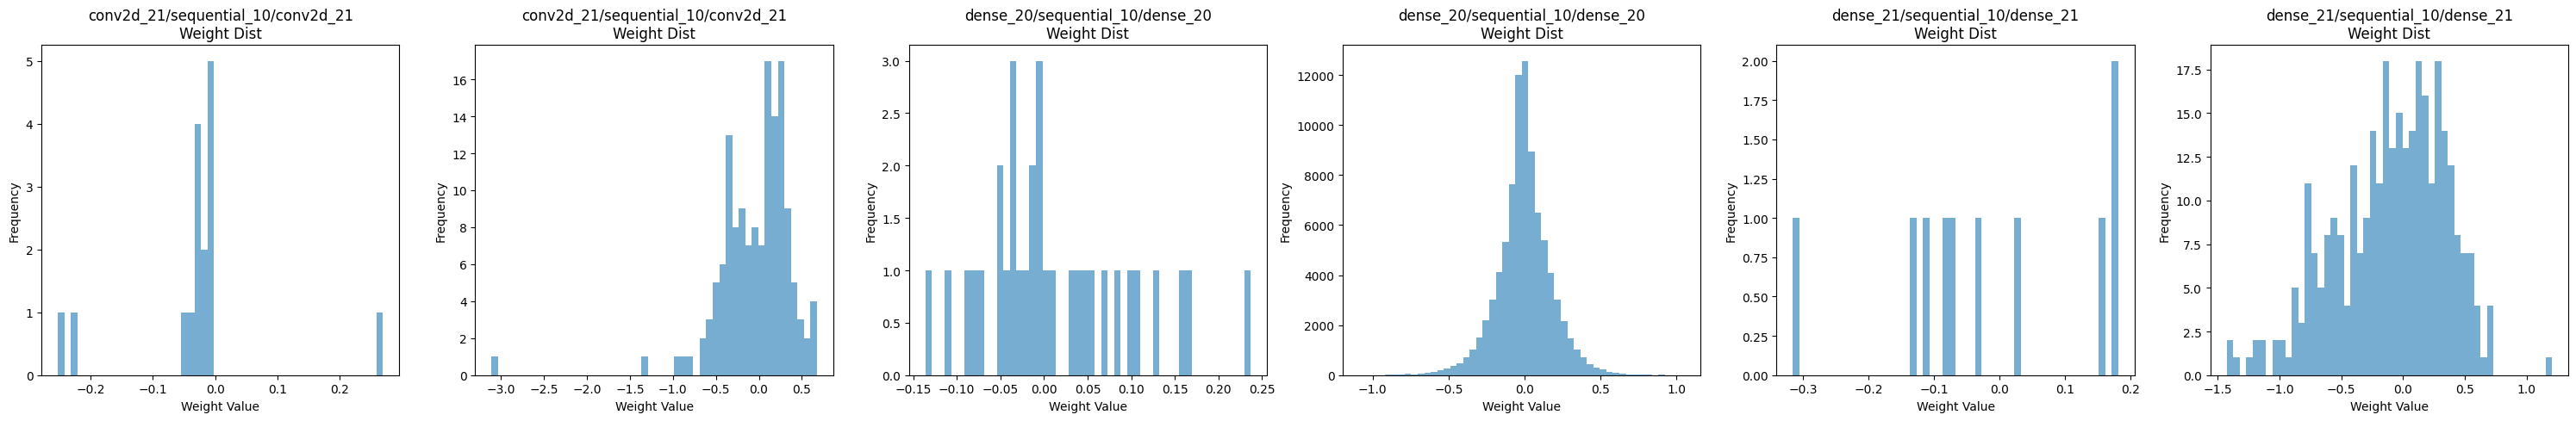

poorly trained:


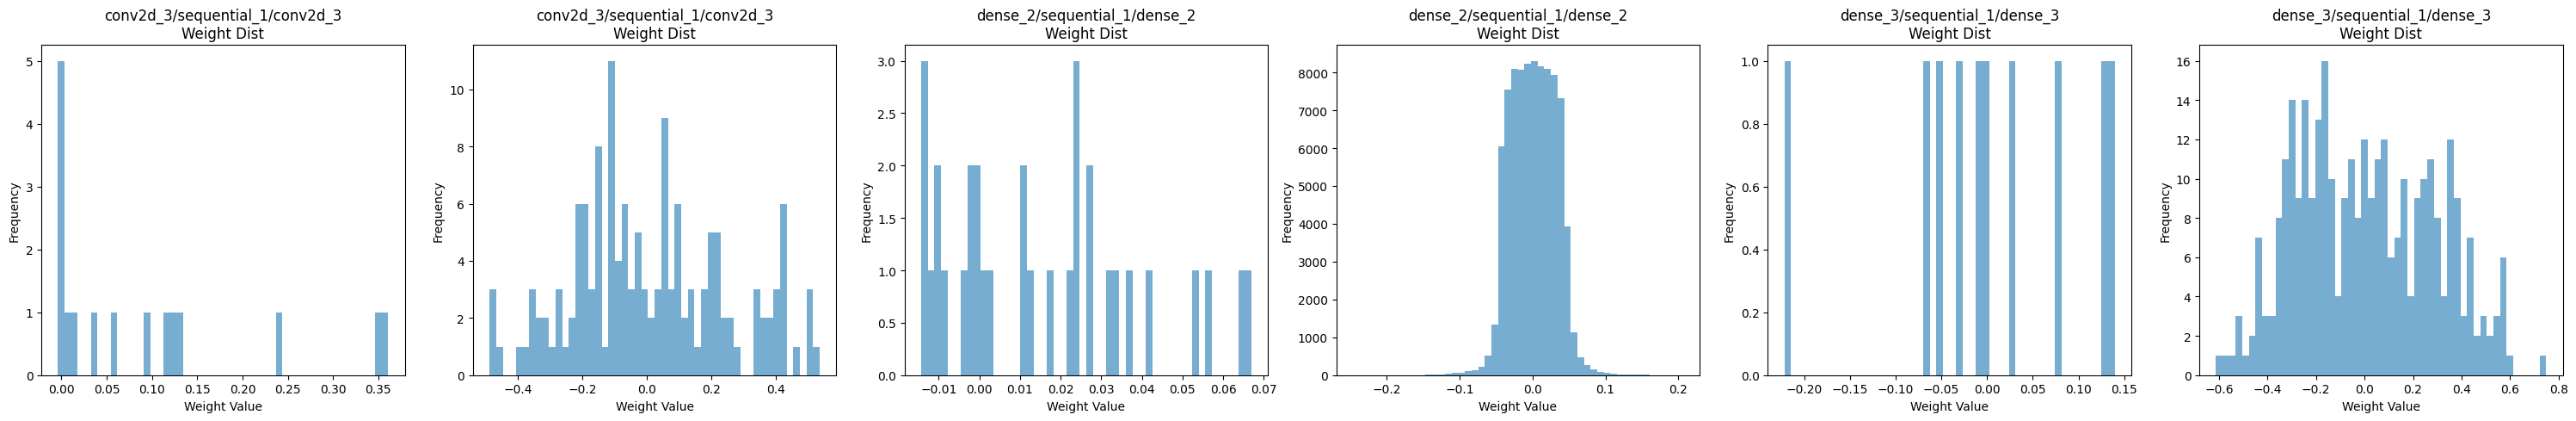

In [77]:
print("well trained:")
plot_individual_weight_distributions("well/model_8.h5")
print("poorly trained:")
plot_individual_weight_distributions("poor/model_0.h5")

## 6.4.3 Variant 5 - Deep CNN

Observations
1.	Well-Trained Network:
	-	Dense layers show symmetric, Gaussian-like distributions centered around zero, indicating effective weight adjustment and proper regularization.
	-	Earlier convolutional layers have slightly broader distributions, reflecting feature extraction and stable optimization.
2.	Poorly-Trained Network:
    -	Weight distributions are irregular and sparse in both convolutional and dense layers, highlighting unstable or incomplete training.
	-	Dense layers fail to achieve a smooth distribution, suggesting either a high learning rate, lack of sufficient training epochs, or poor initialization.

well trained:


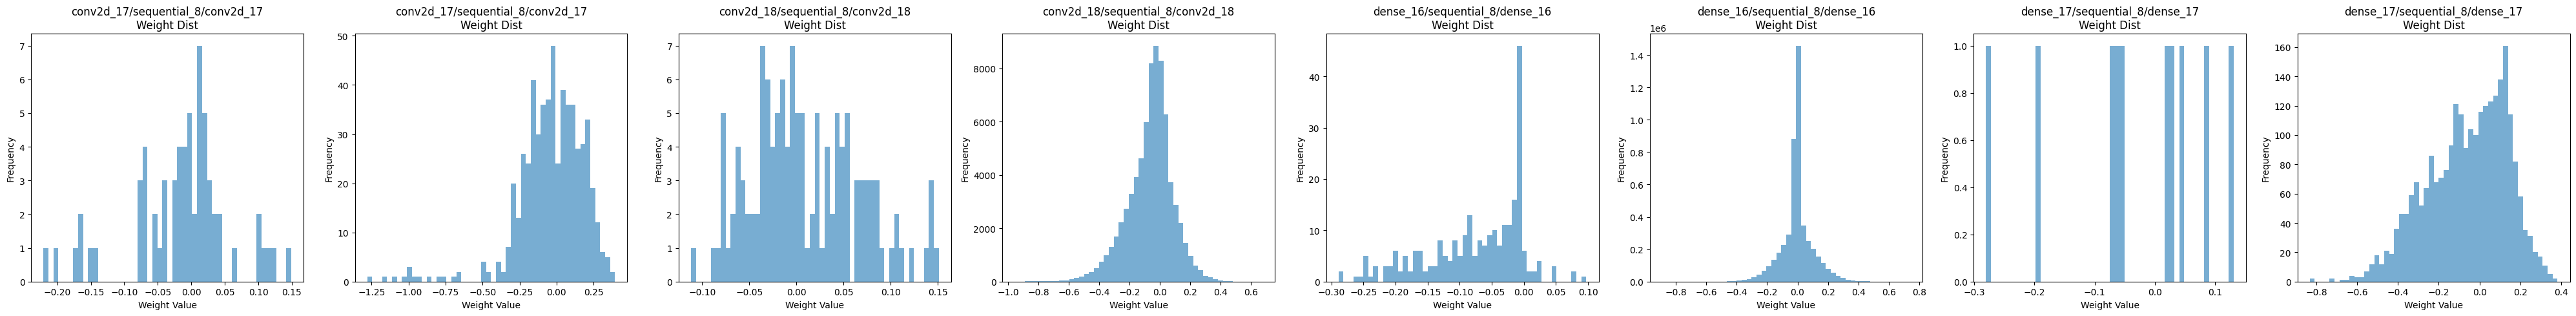

poorly trained:


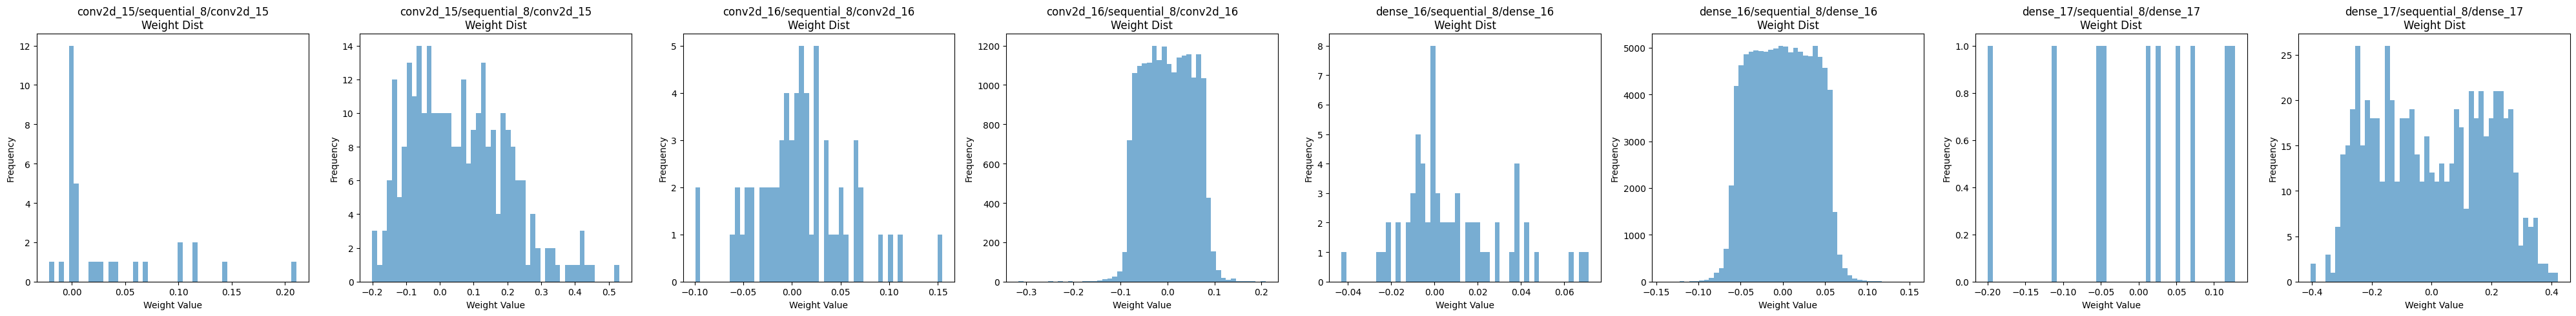

In [79]:
print("well trained:")
plot_individual_weight_distributions("well/model_6.h5")
print("poorly trained:")
plot_individual_weight_distributions("poor/model_7.h5")

## 6.4.5 Well-Trained vs Poorly-Trained Network Test Based on Weight Distributions

To determine if a network is well-trained (1) or poorly-trained (0) using weight distributions, we can implement a statistical test based on key features derived from weight values.

Key Observations:
-	Well-trained networks: Weights are centered around 0, follow a Gaussian-like distribution, and exhibit low variance.
-	Poorly-trained networks: Weights are unevenly distributed, with high variance or uniform-like distributions.

### Gaussian-like distribution test

1. **Feature Extraction**:
   - We will compute key metrics for weights \( w \) across all layers:
     - Mean: 
       $$
       \mu = \frac{1}{n} \sum_{i=1}^{n} w_i
       $$
     - Variance: 
       $$
       \sigma^2 = \frac{1}{n} \sum_{i=1}^{n} (w_i - \mu)^2
       $$
     - Skewness: 
       $$
       S = \frac{\frac{1}{n} \sum_{i=1}^{n} (w_i - \mu)^3}{\sigma^3}
       $$
     - Kurtosis: 
       $$
       K = \frac{\frac{1}{n} \sum_{i=1}^{n} (w_i - \mu)^4}{\sigma^4}
       $$
     - Proportion of near-zero weights: 
       $$
       P_{\text{near zero}} = \frac{\text{Count}(|w_i| < \epsilon)}{n}, \quad \text{where } \epsilon \text{ is a small threshold (e.g., } \epsilon = 0.1\text{)}.
       $$

2. **Define thresholds for well-trained networks:**

-	Mean close to zero:
$$
|\mu| < 0.015
$$
-	Low variance:
$$
\sigma^2 < 0.03
$$
-	Low skewness:
$$
|S| < 0.25
$$
-	Gaussian-like kurtosis:
$$
4 < K < 8
$$
-	Proportion of near-zero weights:
$$
P_{\text{near zero}} = \frac{\text{Count}(|w_i| < \epsilon)}{n}, \quad P_{\text{near zero}} > 0.6, \quad \text{where } \epsilon \text{ is a small threshold (e.g., } \epsilon = 0.1\text{)}.
$$


   - A network is classified as **well-trained (1)** if these conditions are satisfied; otherwise, it is **poorly-trained (0)**.

3. Statistical Test Formula

The network is classified based on:

$$
T = 
\begin{cases} 
1 & \text{if } |\mu| < \mu_{\text{max}} \land \sigma^2 < \sigma^2_{\text{max}} \land S \approx 0 \land 2 < K < 4 \land P_{\text{near zero}} > P_{\text{threshold}} \\ 
0 & \text{otherwise.}
\end{cases}
$$

In [ ]:
import h5py
import numpy as np
from scipy.stats import kurtosis, skew
import pandas

In [ ]:
def recursive_collect_weights(group, weights):
    """
    Recursively collects weights from the h5 model file.
    """
    for key in group.keys():
        item = group[key]
        if isinstance(item, h5py.Group):
            recursive_collect_weights(item, weights)
        elif isinstance(item, h5py.Dataset):
            weights.append(item[:])  # Collects data from weights

def compute_metrics(weights, epsilon=0.1):
    """
    Computes metrics: mean, variance, skewness, kurtosis, and proportion of near-zero weights.
    """
    all_weights = np.concatenate([w.flatten() for w in weights if w.size > 0])

    mean = np.mean(all_weights)
    variance = np.var(all_weights)
    skewness = np.mean(((all_weights - mean) / np.std(all_weights)) ** 3)
    kurtosis = np.mean(((all_weights - mean) / np.std(all_weights)) ** 4)
    near_zero_proportion = np.sum(np.abs(all_weights) < epsilon) / all_weights.size

    return mean, variance, skewness, kurtosis, near_zero_proportion

def classify_network(mean, variance, skewness, kurtosis, near_zero_proportion):
    """
    Classify the network based on refined thresholds.
    """
    mean_threshold = 0.015
    variance_threshold = 0.03
    skewness_threshold = 0.25
    kurtosis_min = 4
    kurtosis_max = 8
    near_zero_proportion_threshold = 0.6

    if (abs(mean) < mean_threshold and
        variance < variance_threshold and
        abs(skewness) < skewness_threshold and
        kurtosis_min < kurtosis < kurtosis_max and
        near_zero_proportion > near_zero_proportion_threshold):
        return 1  # Well-trained
    else:
        return 0  # Poorly-trained

def analyze_models(model_paths):
    results = []

    for model_path in model_paths:
        try:
            with h5py.File(model_path, "r") as f:
                if "model_weights" in f.keys():
                    weights = []
                    recursive_collect_weights(f["model_weights"], weights)

                    if not weights:
                        print(f"No weights found in the model: {model_path}")
                        continue

                    mean, variance, skewness, kurtosis, near_zero_proportion = compute_metrics(weights)
                    classification = classify_network(mean, variance, skewness, kurtosis, near_zero_proportion)
                    results.append({
                        "Model": model_path,
                        "Mean": mean,
                        "Variance": variance,
                        "Skewness": skewness,
                        "Kurtosis": kurtosis,
                        "Near-Zero Proportion": near_zero_proportion,
                        "Classification": "Well-trained" if classification == 1 else "Poorly-trained"
                    })
                else:
                    print(f"The file does not contain 'model_weights': {model_path}")
        except Exception as e:
            print(f"Error while analyzing model {model_path}: {e}")

    return pandas.DataFrame(results)

# Define paths for the models
model_paths = [f"well/model_{i}.h5" for i in range(10)]
results_df_well = analyze_models(model_paths)
print("Well-Trained results:")
print(results_df_well)

model_paths = [f"poor/model_{i}.h5" for i in range(10)]
results_df_poor = analyze_models(model_paths)
print("Poor-Trained results:")
print(results_df_poor)

Well-Trained results:
             Model      Mean  Variance  Skewness  Kurtosis  \
0  well/model_0.h5 -0.013678  0.019762 -0.453666  7.762246   
1  well/model_1.h5 -0.011408  0.022127 -0.203221  5.467052   
2  well/model_2.h5 -0.012800  0.015394 -0.184149  4.638997   
3  well/model_3.h5 -0.013283  0.017814 -0.520811  8.537607   
4  well/model_4.h5 -0.002791  0.030230 -0.315386  7.318425   
5  well/model_5.h5 -0.011624  0.014606 -0.244935  5.287287   
6  well/model_6.h5 -0.003081  0.010835 -0.025923  5.497080   
7  well/model_7.h5 -0.012650  0.021511 -0.472656  7.403098   
8  well/model_8.h5 -0.003138  0.032151 -0.244425  6.360199   
9  well/model_9.h5 -0.003705  0.010229 -0.037579  5.543085   

   Near-Zero Proportion  Classification  
0              0.629779  Poorly-trained  
1              0.612952    Well-trained  
2              0.653851    Well-trained  
3              0.663996  Poorly-trained  
4              0.573705  Poorly-trained  
5              0.688495    Well-trained  
6

## 6.2. Gradient Distribution Analysis
The analyze_gradients function evaluates the gradient distributions for a given model. Gradients are essential for updating weights during backpropagation. The steps include:

    -	Loading a specified model from a file path.
    -	Computing the gradients for a single input sample and its corresponding label.
    -	Visualizing the gradient distribution across all trainable layers using histograms.

Gradient distributions help identify learning stability and convergence properties. Well-trained networks usually have gradients that are neither vanishing (too small) nor exploding (too large).

In [61]:
import numpy as np
import matplotlib.pyplot as plt

def load_gradients_from_file(file_path):
    gradients = []
    with open(file_path, "r") as f:
        layer_gradients = []
        for line in f:
            if line.startswith("Layer"):  # Rozdzielenie warstw
                if layer_gradients:
                    gradients.append(np.array(layer_gradients))
                    layer_gradients = []
            else:
                try:
                    # Dodawanie do listy
                    layer_gradients.extend(map(float, line.strip().split(",")))
                except ValueError:
                    pass
        if layer_gradients: 
            gradients.append(np.array(layer_gradients))
    return gradients

def visualize_gradients(file_path):
    gradients = load_gradients_from_file(file_path)
    
    if not gradients:
        print("Brak gradientów do wizualizacji.")
        return
    
    # Tworzenie wykresów
    plt.figure(figsize=(20, 4))
    for i, grad in enumerate(gradients):
        if grad.size > 0: 
            plt.subplot(1, len(gradients), i + 1)
            plt.hist(grad, bins=20, alpha=0.7, edgecolor='black')
            plt.title(f'Layer {i + 1} Gradient Distribution')
            plt.xlabel("Gradient Value")
            plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


## 6.2.1 Deep CNN - gradients distribution

First Network (Top Plot):
-	Vanishing Gradients: Most gradients are extremely close to zero, especially in deeper layers, indicating the vanishing gradient problem. This prevents effective weight updates.
-	Lack of Diversity: Gradients across layers are almost identical, suggesting the model struggles to learn effectively.

Conclusion: The first network is poorly trained due to vanishing gradients, likely caused by issues like unsuitable activation functions, poor weight initialization, or architectural problems.

Second Network (Bottom Plot):
-	Healthy Gradient Range: Gradients are more diverse and within an appropriate range, especially in earlier layers, allowing effective learning.
-	Sufficient Updates in Deeper Layers: While gradients are smaller in deeper layers (expected behavior), they still show enough variation to support learning.

Conclusion: The second network is well-trained, with balanced and diverse gradients indicating effective learning.

Summary:
-	First Network: Poor training due to vanishing gradients.
-	Second Network: Proper training with healthy gradient distributions.

Recommendations for the First Network:
-	Use ReLU instead of sigmoid activation functions.
-	Employ proper weight initialization (e.g., He initialization).
-	Add techniques like Batch Normalization to mitigate vanishing gradients.
-	Optimize the learning rate or switch to an advanced optimizer like Adam.

poor trained:


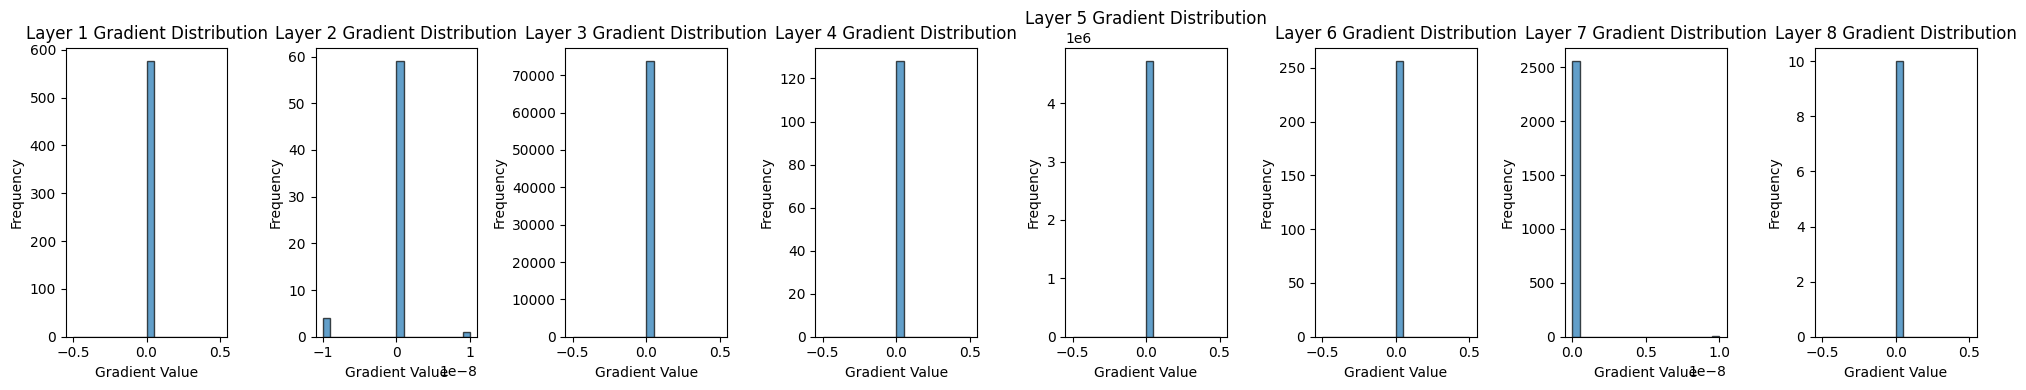

well trained:


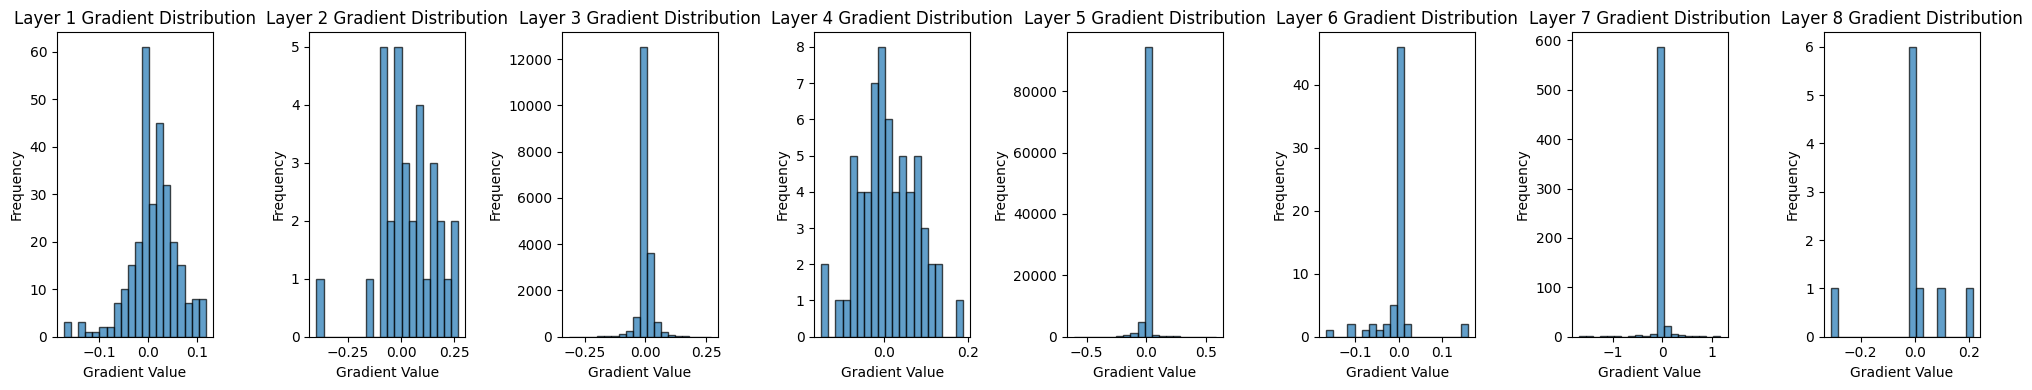

In [68]:
print("poor trained:")
visualize_gradients("poor/gradients/model_6_gradients.txt")
print("well trained:")
visualize_gradients("well/gradients/model_7_gradients.txt")

## 6.2.2 Basic CNN - gradients distribution

1.	First Network (Top Plot):
-	Gradients are very small, especially in deeper layers, indicating the vanishing gradient problem.
-	The narrow range of gradient values suggests the network struggles to propagate meaningful updates.

2.	Second Network (Bottom Plot):
-	Gradients have a wider and healthier range in early layers, enabling better learning.
-	Despite smaller gradients in deeper layers, there is sufficient variation to support training.

Conclusion:
The second network is better trained, showing balanced and diverse gradients, while the first network suffers from poor training due to vanishing gradients.

poor trained:


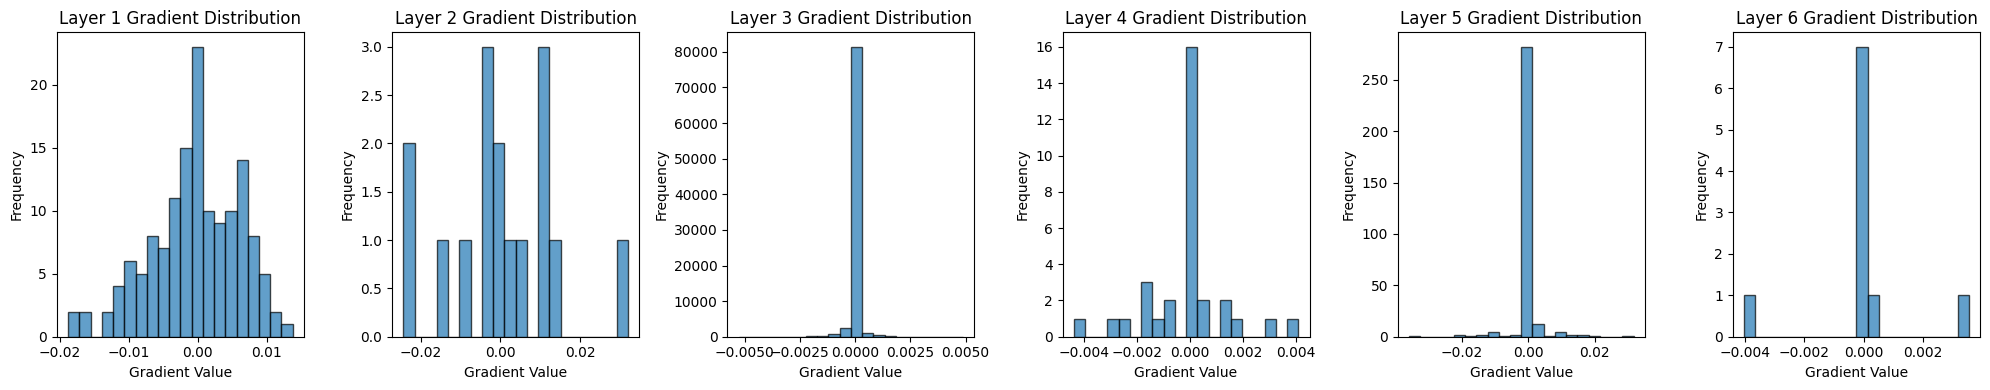

well trained:


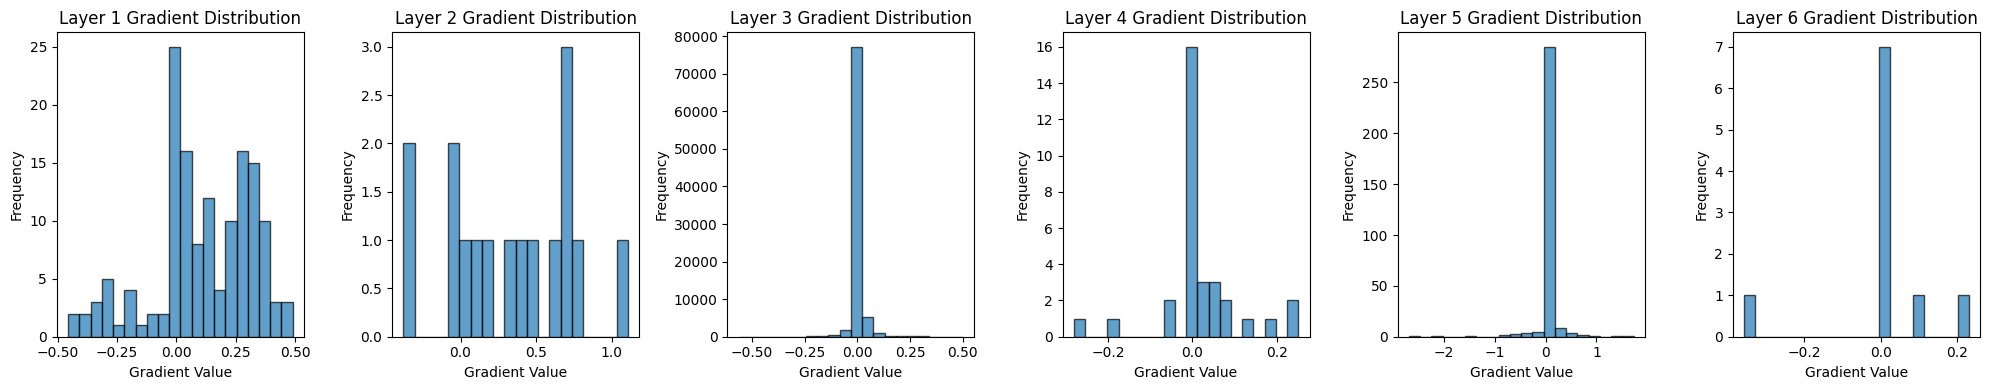

In [74]:
print("poor trained:")
visualize_gradients("poor/gradients/model_8_gradients.txt")
print("well trained:")
visualize_gradients("well/gradients/model_0_gradients.txt")

## 6.2.3 Wide CNN - gradients distribution

1.	First Network (Top Plot):
-	Gradients are uniformly distributed around zero, with very narrow ranges across all layers.
-	This suggests that the network is not effectively propagating meaningful updates, likely due to gradient saturation or dead neurons.
-	Layers 7–10 show significant stagnation, indicative of poor training dynamics.

2.	Second Network (Bottom Plot):
-	Early layers exhibit a healthy spread of gradients, supporting learning with diverse updates.
-	Deeper layers (e.g., 7–10) have smaller gradients but maintain sufficient variation to enable backpropagation.
-	The network avoids issues like vanishing gradients entirely, suggesting proper optimization.

Conclusion:
The second network is better trained, demonstrating a healthy gradient flow, while the first network is poorly optimized, suffering from narrow gradient ranges and ineffective training in deeper layers

poor trained:


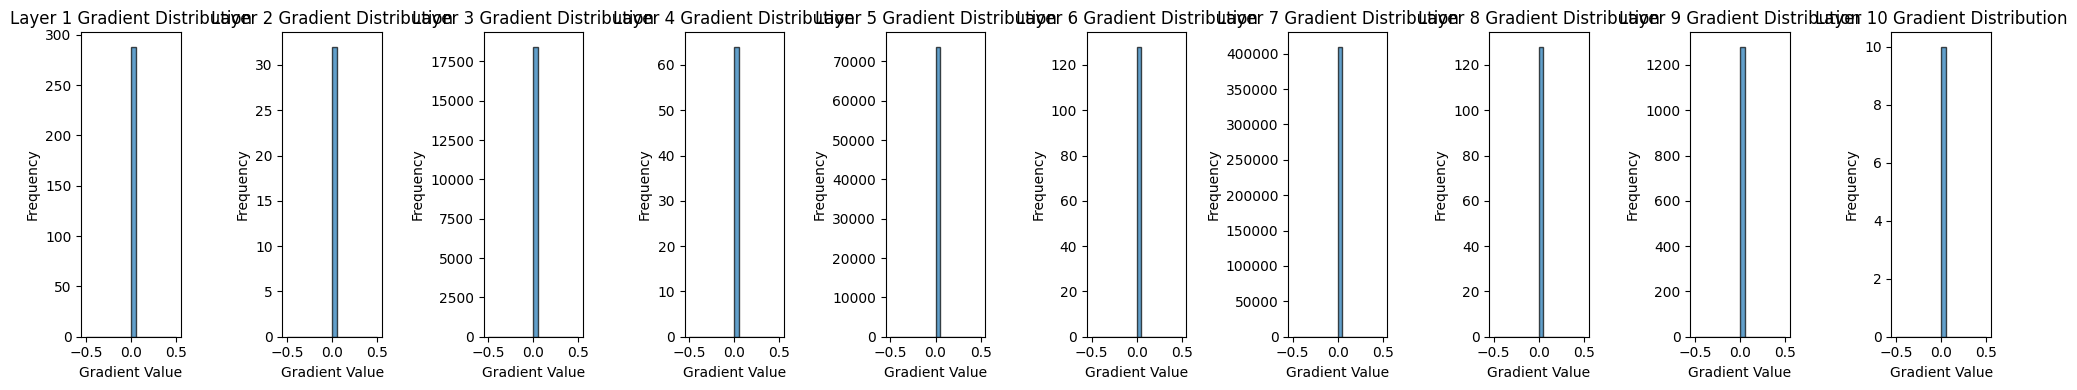

well trained:


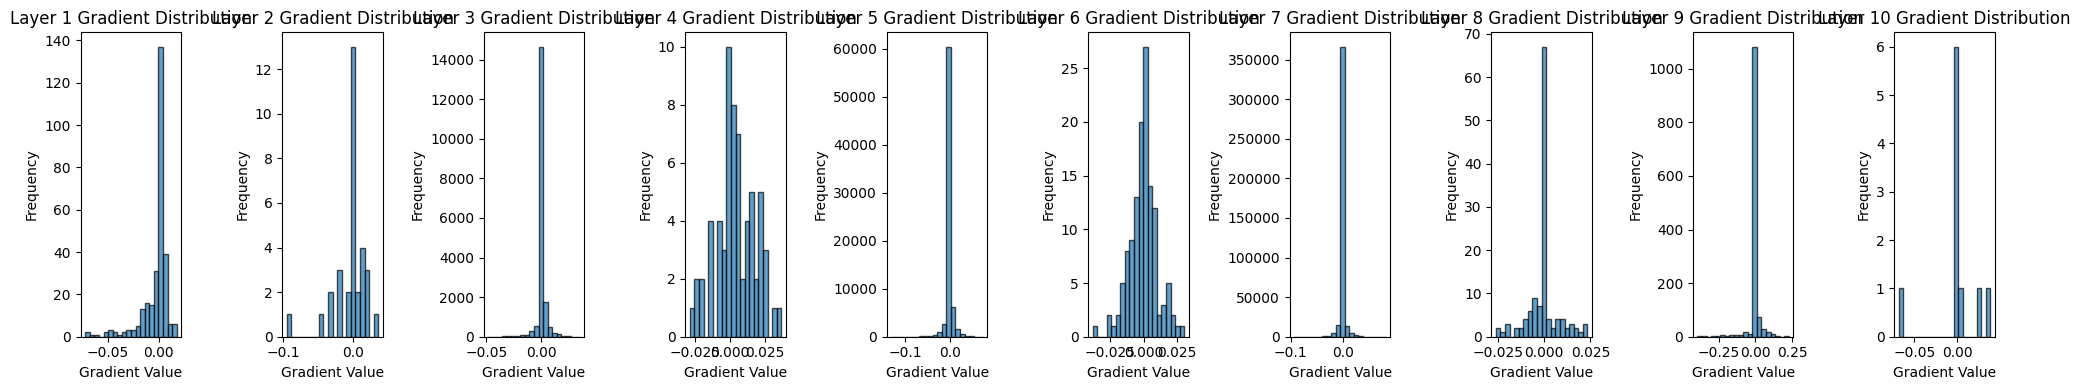

In [75]:
print("poor trained:")
visualize_gradients("poor/gradients/model_2_gradients.txt")
print("well trained:")
visualize_gradients("well/gradients/model_9_gradients.txt")

## 6.2.4 Dropout CNN - gradients distribution

1.	First Network (Top Plot):
-	Gradients are extremely small, centered narrowly around zero for most layers.
-	The lack of variation suggests poor gradient propagation and potential issues with over-regularization or ineffective training.
-	Higher layers, such as 7–8, show minimal updates, indicating significant saturation or vanishing gradients.
2.	Second Network (Bottom Plot):
-	Gradients are more diverse, with reasonable variation in the earlier layers.
-	Deeper layers show some reduction in gradient magnitudes but still maintain enough variance for effective learning.
-	The network demonstrates better optimization dynamics, benefiting from the regularization provided by dropout while avoiding over-regularization.

Conclusion:
The second network (bottom) demonstrates a healthier training process, balancing dropout regularization and gradient flow. The first network (top) appears poorly trained, likely due to overly small gradients and stagnation in deeper layers.

poor trained:


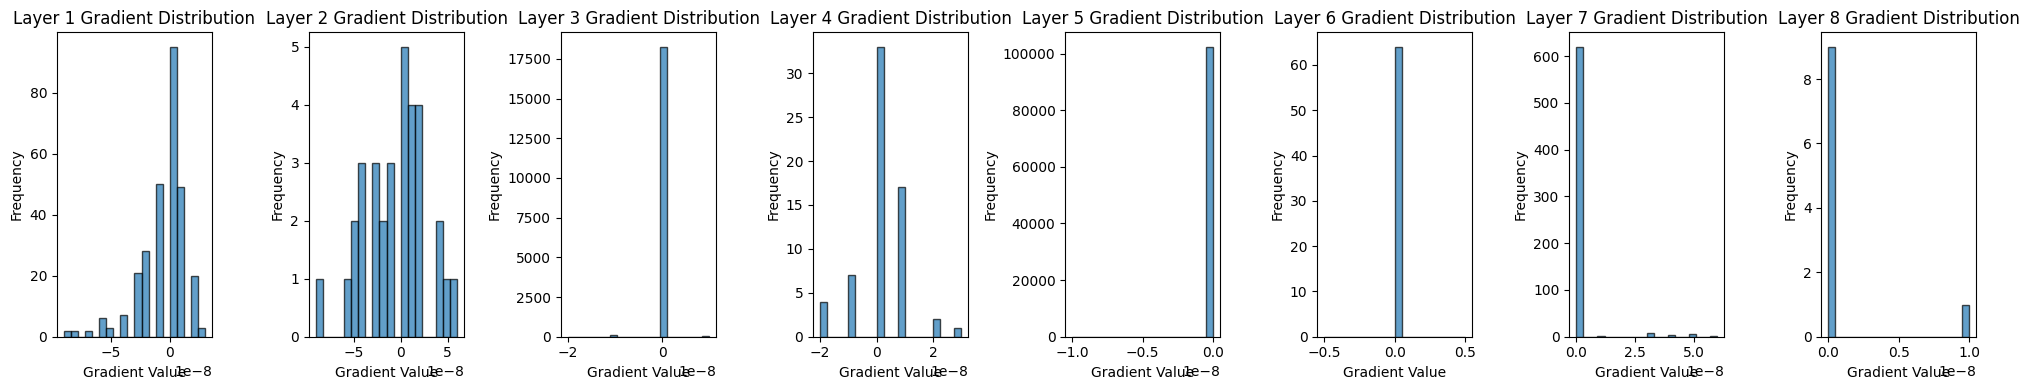

well trained:


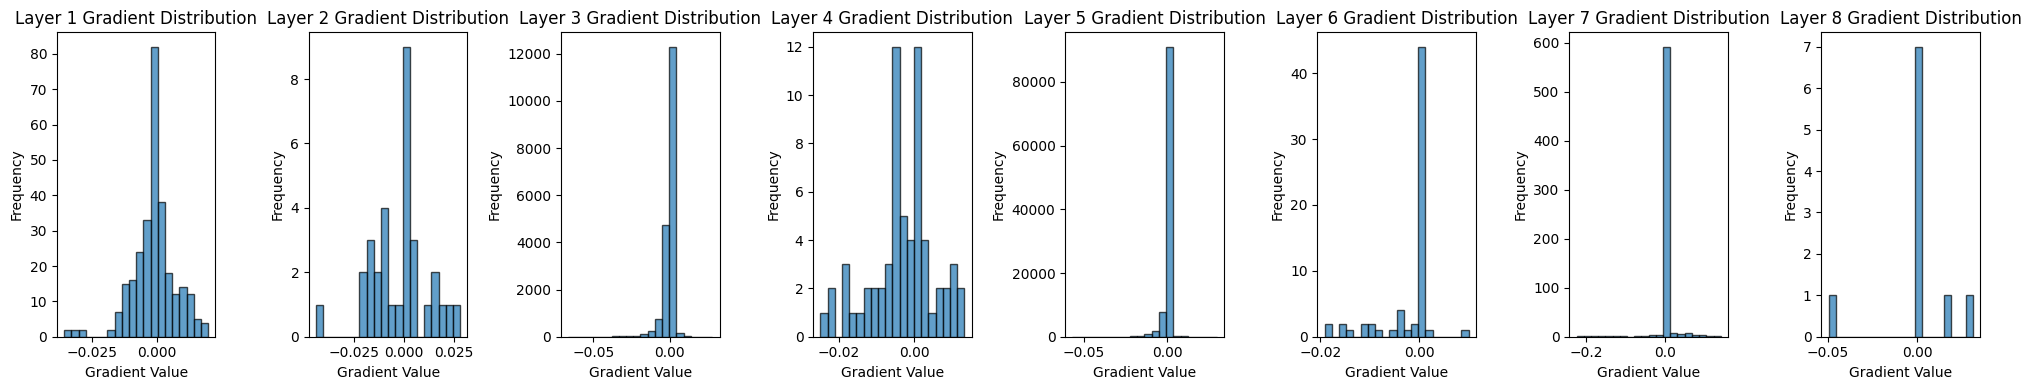

In [76]:
print("poor trained:")
visualize_gradients("poor/gradients/model_0_gradients.txt")
print("well trained:")
visualize_gradients("well/gradients/model_4_gradients.txt")

## 6.2.5. Gradient Distribution Test

1.	Define thresholds for well-trained networks:
-	Mean close to zero:
$$
|\mu| < 0.005
$$
-	Variance within range:
$$
0.00001 < \sigma^2 < 0.003
$$
-	Skewness approximately zero:
$$
-5 < S < 1
$$
-	Kurtosis within a valid range:
$$
100 < K < 650
$$
-	A network is classified as well-trained (1) if these conditions are satisfied for its gradient distributions; otherwise, it is poorly-trained (0).
	2.	Special Cases:
-	If the standard deviation  \sigma = 0 , skewness  S  and kurtosis  K  are set to NaN.
-	Networks with NaN values for skewness or kurtosis are automatically classified as poorly-trained because zero-gradient layers indicate vanishing gradients, a hallmark of poorly-trained networks.
	3.	Statistical Test Formula:
The classification is based on the following criteria:
$$
T =
\begin{cases}
1 & \text{if } |\mu| < \mu_{\text{max}} \land \sigma^2_{\text{min}} < \sigma^2 < \sigma^2_{\text{max}} \land S_{\text{min}} < S < S_{\text{max}} \land K_{\text{min}} < K < K_{\text{max}} \
0 & \text{otherwise.}
\end{cases}
$$

Interpretation:

This test evaluates whether the gradient distributions across layers align with properties of well-trained networks:
-	Gradients with a mean close to zero and moderate variance suggest a balanced weight update process.
-	Skewness close to zero indicates symmetric gradient updates, avoiding strong bias in one direction.
-	Kurtosis within the defined range ensures no extreme concentration or dispersion of gradients.
-	NaN handling directly flags poorly-trained networks with vanishing gradients.

This approach provides a systematic method to identify whether the training process has produced a stable and effective model.

In [21]:
def load_gradients_from_file(file_path):
    """
    Load gradients from a file and organize them by layers.
    """
    gradients = []
    with open(file_path, "r") as f:
        layer_gradients = []
        for line in f:
            if line.startswith("Layer"):  # Split by layer
                if layer_gradients:
                    gradients.append(np.array(layer_gradients))
                    layer_gradients = []
            else:
                try:
                    layer_gradients.extend(map(float, line.strip().split(",")))
                except ValueError:
                    pass
        if layer_gradients:
            gradients.append(np.array(layer_gradients))
    return gradients

def compute_gradient_metrics(gradients):
    """
    Computes gradient metrics: mean, variance, skewness, kurtosis.
    Handles cases where std is zero to avoid divide-by-zero errors.
    """
    all_gradients = np.concatenate([g.flatten() for g in gradients if g.size > 0])
    if all_gradients.size == 0:
        return np.nan, np.nan, np.nan, np.nan  # Handle empty gradients

    mean = np.mean(all_gradients)
    variance = np.var(all_gradients)
    std = np.std(all_gradients)
    
    if std == 0:  # Avoid division by zero
        skewness = np.nan
        kurtosis = np.nan
    else:
        skewness = np.mean(((all_gradients - mean) / std) ** 3)
        kurtosis = np.mean(((all_gradients - mean) / std) ** 4)

    return mean, variance, skewness, kurtosis

def classify_gradients(mean, variance, skewness, kurtosis):
    """
    Classify the network based on gradient metrics.
    """
    # Updated thresholds
    mean_threshold = 0.005
    variance_threshold_min = 0.00001
    variance_threshold_max = 0.003
    skewness_min = -5
    skewness_max = 1
    kurtosis_min = 100
    kurtosis_max = 650

    if (not np.isnan(skewness) and not np.isnan(kurtosis) and
        abs(mean) < mean_threshold and
        variance_threshold_min < variance < variance_threshold_max and
        skewness_min < skewness < skewness_max and
        kurtosis_min < kurtosis < kurtosis_max):
        return "Well-trained"
    else:
        return "Poorly-trained"

def analyze_gradient_files(file_paths):
    """
    Analyze gradient files and compile results in a DataFrame.
    """
    results = []

    for file_path in file_paths:
        gradients = load_gradients_from_file(file_path)
        mean, variance, skewness, kurtosis = compute_gradient_metrics(gradients)
        classification = classify_gradients(mean, variance, skewness, kurtosis)

        results.append({
            "File": file_path,
            "Mean": mean,
            "Variance": variance,
            "Skewness": skewness,
            "Kurtosis": kurtosis,
            "Classification": classification
        })

    return pd.DataFrame(results)

# Example usage
well_trained_files = [f"well/gradients/model_{i}_gradients.txt" for i in range(10)]
poorly_trained_files = [f"poor/gradients/model_{i}_gradients.txt" for i in range(10)]

well_trained_results = analyze_gradient_files(well_trained_files)
poorly_trained_results = analyze_gradient_files(poorly_trained_files)

print("Well-Trained Gradients Results:")
print(well_trained_results)

print("\nPoorly-Trained Gradients Results:")
print(poorly_trained_results)

Well-Trained Gradients Results:
                                   File      Mean  Variance   Skewness  \
0  well/gradients/model_0_gradients.txt  0.003497  0.001434  -4.071740   
1  well/gradients/model_1_gradients.txt  0.001807  0.001430   0.105002   
2  well/gradients/model_2_gradients.txt -0.000194  0.000045  -0.939342   
3  well/gradients/model_3_gradients.txt  0.002071  0.002504  -1.478465   
4  well/gradients/model_4_gradients.txt -0.000564  0.000010 -10.893010   
5  well/gradients/model_5_gradients.txt  0.001807  0.001430   0.105002   
6  well/gradients/model_6_gradients.txt -0.001271  0.000095  -3.013085   
7  well/gradients/model_7_gradients.txt -0.001703  0.000932  -2.218737   
8  well/gradients/model_8_gradients.txt  0.001052  0.000409  -1.743948   
9  well/gradients/model_9_gradients.txt -0.000151  0.000034  -3.144766   

     Kurtosis  Classification  
0  597.142286    Well-trained  
1  414.993740    Well-trained  
2  489.509344    Well-trained  
3  494.050678    Well-tra

## 6.3. Summary

After analyzing multiple neural networks using both weight and gradient-based classification methods, the following observations were made:
1.	Gradient-Based Classification:
	-	The gradient-based classification proved to be more reliable in identifying well-trained networks.
	-	Gradients provide direct insight into the learning dynamics of a model, including issues like vanishing or exploding gradients that are strong indicators of poor training.
2.	Weight-Based Classification:
	-	Weight-based classification also demonstrated utility in assessing training quality. While weights reflect the network’s learned parameters, they do not directly capture training dynamics.
	-	This method is effective at identifying models with poor weight distributions, such as extreme biases or insufficient diversity in weight magnitudes.
3.	Comparative Evaluation:
	-	While gradient analysis provided more consistent classification accuracy across tested networks, weight analysis remains a valuable supplementary tool. Weight metrics such as mean, variance, skewness, and kurtosis offer insights into the model’s capacity to generalize and avoid overfitting.
4.	Practical Implications:
	-	Combining these two methods enables a more comprehensive evaluation of network training. Gradients are excellent for diagnosing training dynamics, while weights provide a static snapshot of the learned state.
	-	This dual approach ensures robust classification of well-trained and poorly-trained networks, improving the reliability of training evaluation processes.

In conclusion, gradient-based classification outperformed weight-based methods, but both approaches together create a more holistic assessment pipeline for evaluating neural network training quality.